Importing Neccessary Library

In [2]:
#importing pandas 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading Data

In [234]:
#Loading data 
pd.set_option('display.max_rows',1000)
pd.read_csv("C:/Users/user/Desktop/Netflix Dataset/netflix_titles.csv")
df = pd.read_csv("C:/Users/user/Desktop/Netflix Dataset/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Data Summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Handling Missing Values

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Handling Duplicate

In [8]:
df.duplicated().sum()

0

Import Neccessary Library

In [10]:
import numpy as np

Handling Missing Values In Specific columns 

In [13]:
#Replacing missing values in the director column with no data
df['director'].replace(np.nan, 'No Data', inplace = True)

#Replaccing missing values in the cast column with no data
df['cast'].replace(np.nan, 'No Data', inplace = True)

In [16]:
#Replacing the missing values in country coulumn with the mode value 
df['country'] = df['country'].fillna(df['country'].mode()[0])

0

In [21]:
#Finding the mode rating for Movie and Tv show
movie_rating = df.loc[df['type'] == 'Movie', 'rating'].mode()[0]
tv_rating = df.loc[df['type'] == 'TV Show', 'rating'].mode()[0]

#Filling Misssing Rating Values based on the type of content
df['rating'] = df.apply(lambda x : movie_rating if x['type']== 'Movie' and pd.isna(x['rating'])
                       else tv_rating if x['type'] == 'TV Show' and pd.isna(x['rating'])
                       else x['rating'], axis = 1)




In [26]:
#Finding the mode diration for Movie and Tv Show 
movie_duration_mode = df.loc[df['type'] == 'Movie', 'duration'].mode()[0]
tv_duration_mode = df.loc[df['type'] == 'TV Show', 'duration'].mode()[0]

#Filling missing duration value based on the type of content 
df['duration'] = df.apply(lambda x: movie_duration_mode if x['type'] == 'Movie' and pd.isna(x['duration'])
                         else tv_duration_mode if x['type'] == 'TV Show'and pd.isna(x['duration'])
                         else x['duration'], axis =1 )

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

Dropping Remaining Missing Values

In [27]:
#Dropping all rows with missing values 
df.dropna(inplace = True)

Date Handling

In [36]:
#Converting date added colum into datetime format
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')


Additional Data Transformation 

In [37]:
#Extracting Month, Month Added and Year Added from Date added column 
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name
df['year_added'] = df['date_added'].dt.year

Data Transformation : Cast, Country, Listed In and Director 

In [43]:
#Splitting and expanding the cast column 
df_cast = df['cast'].str.split(',',expand = True).stack()
df_cast = df_cast.reset_index(level=1, drop = True).to_frame('cast')
df_cast['show_id']= df['show_id']

,cast,show_id
0,No Data,s1
1,Ama Qamata,s2
1,Khosi Ngema,s2
1,Gail Mabalane,s2
1,Thabang Molaba,s2
...,...,...
11,Waratthaya Wongchayaporn,s12
11,Kittiphoom Wongpentak,s12
11,Abhicha Thanachanun,s12
11,Nophand Boonyai,s12


In [45]:
#Spltting and expanding the country coumn
df_country = df['country'].str.split(',',expand = True).stack()
df_country = df_country.reset_index(level=1, drop = True).to_frame('country')
df_country['show_id']= df['show_id']
df_country

,country,show_id
0,United States,s1
1,South Africa,s2
2,United States,s3
3,United States,s4
4,India,s5
...,...,...
8802,United States,s8803
8803,United States,s8804
8804,United States,s8805
8805,United States,s8806


In [129]:
#Splitting and expanding 'listed in' column 
df_listed_in = df['listed_in'].str.split(',', expand =True).stack()
df_listed_in = df_listed_in.reset_index(level=1, drop =True).to_frame('listed_in')
df_listed_in['show_id'] = df['show_id']
df_listed_in.head(10)

,listed_in,show_id
0,Documentaries,s1
1,International TV Shows,s2
1,TV Dramas,s2
1,TV Mysteries,s2
2,Crime TV Shows,s3
2,International TV Shows,s3
2,TV Action & Adventure,s3
3,Docuseries,s4
3,Reality TV,s4
4,International TV Shows,s5


In [232]:
#Splitting and expanding the director column 
df_director = df['director'].str.split(',', expand =True).stack()
df_director = df_director.reset_index(level=1, drop =True).to_frame('director')
df_director['show_id'] = df['show_id']
df_director.head()

,director,show_id
0,Kirsten Johnson,s1
2,Julien Leclercq,s3
5,Mike Flanagan,s6
6,Robert Cullen,s7
6,José Luis Ucha,s7


Exploratory Data Analysis

Distribution Of Content Types

In [56]:
#calculating the percentage distribution of content types 
x = df.groupby('type')['type'].count()
y = len(df)
r = ((x/y)*100).round(2)
r

type
Movie      69.69
TV Show    30.31
Name: type, dtype: float64

In [60]:
#CReating a Dataframe to store the percentage distribution
percentage_distribution = pd.DataFrame(r)
percentage_distribution.rename({'type': 'percentage %'}, axis = 1, inplace=True)
percentage_distribution

,percentage %
type,
Movie,69.69
TV Show,30.31


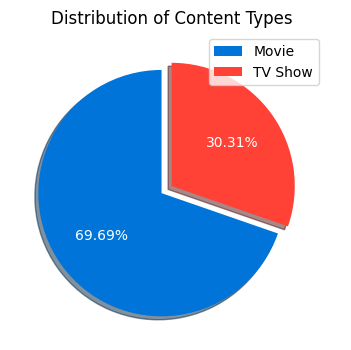

In [72]:
# Plotting a 3D-effect pie chart
plt.figure(figsize=(6, 4))
colors = ['#0074D9', '#FF4136'] 
explode = (0.1, 0)
plt.pie(percentage_distribution['percentage %'], labels=percentage_distribution.index, autopct='%1.2f%%', colors=colors, explode=explode, shadow=True, startangle=90, textprops={'color': "white"})

plt.legend(loc='upper right')
plt.title('Distribution of Content Types')
plt.show()


Top 10 Countries Where Netflix is Popular 

In [78]:
#removing white space from country column 
df_country['country']= df_country['country'].str.rstrip()

#Finding the Value count 
country_count = df_country['country'].value_counts()


#Selecting top 10 countries 
top_10_countries = country_count.head(10)
top_10_countries

country
United States     4035
India             1008
United Kingdom     627
 United States     479
Canada             271
Japan              258
France             212
South Korea        211
Spain              181
 France            181
Name: count, dtype: int64

In [ ]:
#plotting bar chart for top 10 countries 
plt.figure(figsize = (6,4))
colors = ['#FFA500'] + ['#FFFF00'] * (len(top_10_countries) - 1)
bar_plot = sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette=colors)

plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Top 10 Countries Where Netflix Is Popular')

#Adding count values on top of each bar
for index, value in enumerate(top_10_countries.values):
    bar_plot.text(index,value,str(value),ha= 'center', va = 'bottom')
    
# Rotate the x-axis labels to a slant form for better visibility
plt.xticks(rotation=45, ha='right')
    
plt.show()

Top 10 Actors by Movies/TV Show Count 

In [91]:
#Count the occurence of each actors
cast_count = df_cast['cast'].value_counts()[1:]

#Selecting the Top 10 Actors 
top_10_cast = cast_count.head(10)
top_10_cast

cast
 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
Shah Rukh Khan       26
 Rajesh Kava         26
 Andrea Libman       25
 Boman Irani         25
 Paresh Rawal        25
Name: count, dtype: int64

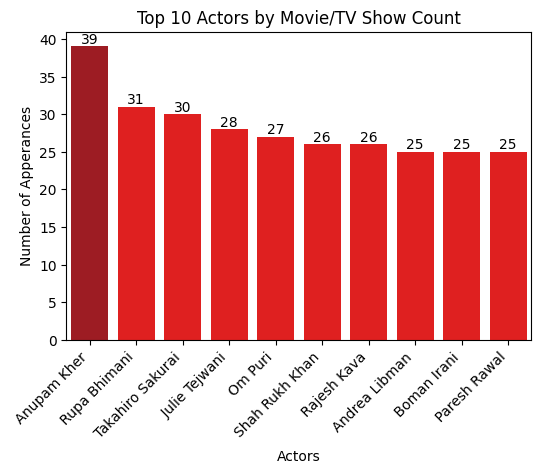

In [142]:
#Plotting bar chart for the top 10 actors 
plt.figure(figsize= (6,4))
colors = ['#b20710'] + ['#ff0000'] * (len(top_10_cast)- 1)
bar_plot = sns.barplot(x= top_10_cast.index, y = top_10_cast.values, palette= colors)

plt.xlabel('Actors')
plt.ylabel('Number of Apperances')
plt.title('Top 10 Actors by Movie/TV Show Count')

#Adding count values on top of each bar
for index, value in enumerate(top_10_cast.values):
    bar_plot.text(index,value,str(value),ha= 'center', va = 'bottom')
    
# Rotate the x-axis labels to a slant form for better visibility
plt.xticks(rotation=45, ha='right')
    
plt.show()

Top 10 Directors by Movie/TV Show Count 

In [107]:
#Counting the occurene of each director
director_counts = df_director['director'].value_counts()[1:]

#Selecting Top 10 Directors 
top_10_directors = director_counts.head(10)
top_10_directors

director
Rajiv Chilaka          22
 Jan Suter             18
Raúl Campos            18
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: count, dtype: int64

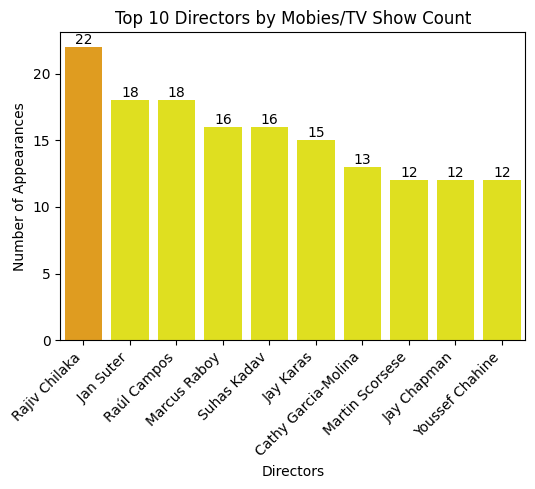

In [141]:
#Plotting bar chart for Top 10 Directors 
plt.figure(figsize=(6,4))
colors = ['#FFA500'] + ['#FFFF00'] * (len(top_10_directors) - 1)
bar_plot = sns.barplot(x=top_10_directors.index, y=top_10_directors.values, palette = colors)

plt.xlabel('Directors')
plt.ylabel('Number of Appearances')
plt.title('Top 10 Directors by Mobies/TV Show Count')


#Adding count values on top of each bar
for index, value in enumerate(top_10_directors.values):
    bar_plot.text(index,value,str(value),ha= 'center', va = 'bottom')
    
# Rotate the x-axis labels to a slant form for better visibility
plt.xticks(rotation=45, ha='right')
    
plt.show()


Top 10 Categories by Movies/TV Show Count 

In [137]:
#Removing the white space in the 'listed_in' column 
df_listed_in['listed_in'] = df_listed_in['listed_in'].str.strip()

#Counting the ocurene of each listed_in
listed_in_counts = df_listed_in['listed_in'].value_counts()
listed_in_counts

#Selecting the top 10 Categories by Movies/TV Show Count 
top_10_categories = listed_in_counts.head(10)
top_10_categories





listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

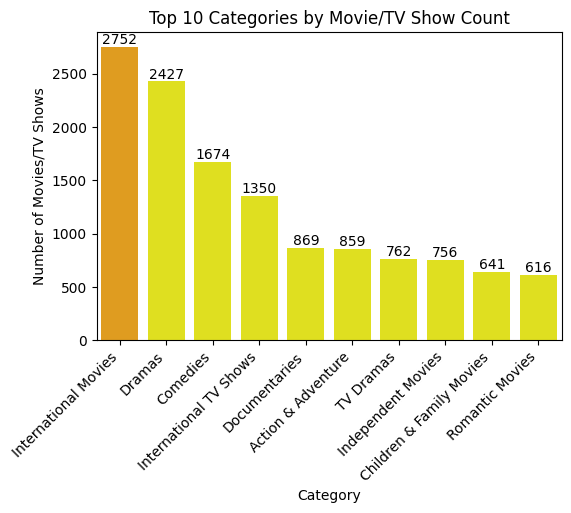

In [140]:
#Plotting bar chart for the top 10 Category by movie/tv shoe count 
plt.figure(figsize=(6,4))
colors = ['#FFA500'] + ['#FFFF00'] * (len(top_10_categories) - 1)
bar_plot = sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette = colors)

plt.xlabel('Category')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Top 10 Categories by Movie/TV Show Count')

#Adding count values on top of each bar
for index, value in enumerate(top_10_categories.values):
    bar_plot.text(index,value,str(value),ha= 'center', va = 'bottom')
    
# Rotate the x-axis labels to a slant form for better visibility
plt.xticks(rotation=45, ha='right')
    
plt.show()


Movies & TV Shows Added Over Time 

In [177]:
#Filtering dataframe so it only includes movies and tv shows 
df_movies = df[df['type']=='Movie']
df_tv_shows = df[df['type']=='TV Show']

#Grouping data by year and count the numbers of Movies and TV Shows added in each year
movies_count = df_movies['year_added'].value_counts().sort_index()
tv_shows_count = df_tv_shows['year_added'].value_counts().sort_index()





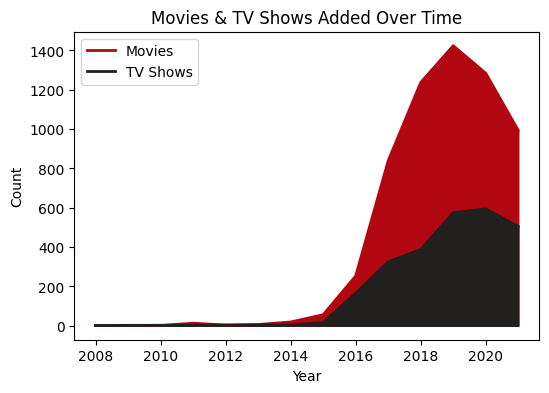

In [184]:
#Ploting a line chart to show the trend over time 
plt.figure(figsize=(6,4))
plt.plot(movie_count.index, movie_count.values, color = '#b20710',label = 'Movies', linewidth=2)
plt.plot(tv_shows_count.index, tv_shows_count.values, color = '#221f1f', label = 'TV Shows', linewidth=2)

#Filling the area under the line charts 

plt.fill_between(movies_count.index, movie_count.values, color = '#b20710')
plt.fill_between(tv_shows_count.index, tv_shows_count.values, color = '#221f1f')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Movies & TV Shows Added Over Time')
plt.legend()

plt.show()
           

Content Added Over the Month

In [216]:
# Extracting months from the year added column
df['month_added'] = pd.to_datetime(df['date_added']).dt.month_name()

# Define the order of months
monthly_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Extract the month from the 'month_added' column and count occurrences
monthly_count = df['month_added'].value_counts().loc[monthly_order]

#Determining the maximum count 
max_count = monthly_count.max()

#Setting color for the maximum monthly added month
color = ['#b20710' if count == max_count
         else '#221f1f' for count in monthly_count]



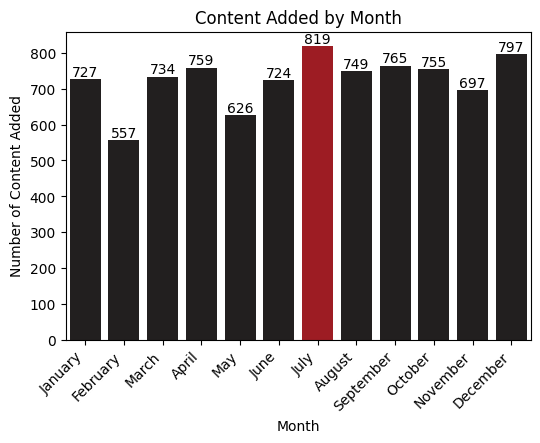

In [224]:
#Plotting a bar chart of content added by month 

plt.figure(figsize=(6,4))
bar_plot = sns.barplot(x=monthly_count.index, y=monthly_count.values, palette = color)

plt.xlabel('Month')
plt.ylabel('Number of Content Added')
plt.title('Content Added by Month')


#Adding count values on top of each bar
for index, value in enumerate(monthly_count):
    bar_plot.text(index,value,str(value),ha= 'center', va = 'bottom')
    
# Rotate the x-axis labels to a slant form for better visibility
plt.xticks(rotation=45, ha='right')
    
plt.show()



Distribution of Ratings 

In [239]:
#Counting the number of occurence of each rating 
rating_count = df['rating'].value_counts()


filtered_rating_count = rating_count.iloc[:-3]
rating_count = filtered_rating_count


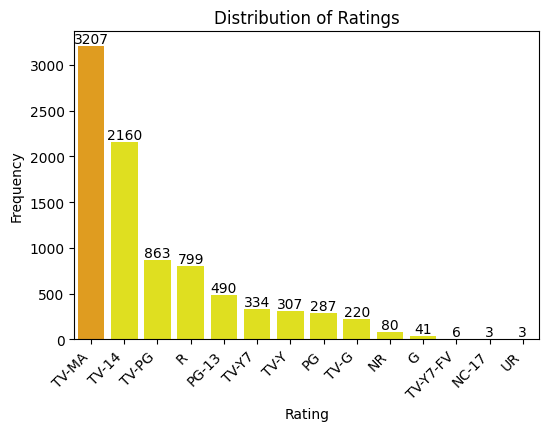

In [252]:
#Plotting bar chart for Distribution of Ratings 
plt.figure(figsize=(6,4))
colors = ['#FFA500'] + ['#FFFF00'] * (len(rating_count) - 1) 
bar_plot =sns.barplot(x=rating_count.index, y=rating_count.values, palette=colors)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

#Adding count values on top of each bar
for index, value in enumerate(rating_count):
    bar_plot.text(index,value,str(value),ha= 'center', va = 'bottom')
    
# Rotate the x-axis labels to a slant form for better visibility
plt.xticks(rotation=45, ha='right')
    
plt.show()


Distribution of Movie Length and Tv Show Episode Count

In [254]:
#Extracting the length of movies and the count of tv show episodes 
movie_length = df_movies['duration'].str.extract('(\d+)', expand = False).astype(int)
tv_show_episodes = df_tv_shows['duration'].str.extract('(\d+)', expand = False).astype(int)

1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: duration, Length: 2666, dtype: int32

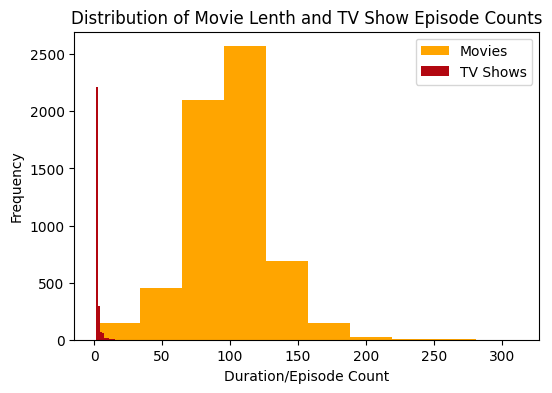

In [260]:
#Plotting a Histogram to show the length of movies and the episode counts for tv shows 
plt.figure(figsize=(6,4))
plt.hist(movie_length, bins =10, color='#FFA500', label = 'Movies')
plt.hist(tv_show_episodes, bins =10, color='#b20710', label= 'TV Shows' )

plt.xlabel('Duration/Episode Count')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Lenth and TV Show Episode Counts')

plt.legend()
plt.show()